In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/train.csv")
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [ ]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
#import all the modules
import nltk
nltk.download("punkt")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split as ttsplit
from sklearn import svm
import pandas as pd
import pickle
import numpy as np
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
dframe = df.iloc[:,0:]

In [ ]:
dframe

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [ ]:
## Here the "author" columns need to be dropped because this not important in the feature selection.
dfmain =dframe.drop(["author"],axis=1)

In [ ]:
dframe = df.iloc[:,0:]

In [ ]:
dfmain.head()

,id,title,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
dfmain.drop(["id"],axis = 1)

,title,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...
20795,Rapper T.I.: Trump a ’Poster Child For White S...,Rapper T. I. unloaded on black celebrities who...,0
20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",When the Green Bay Packers lost to the Washing...,0
20797,Macy’s Is Said to Receive Takeover Approach by...,The Macy’s of today grew from the union of sev...,0
20798,"NATO, Russia To Hold Parallel Exercises In Bal...","NATO, Russia To Hold Parallel Exercises In Bal...",1


In [ ]:
dfmain.isnull().sum()

id         0
title    558
text      39
label      0
dtype: int64

In [ ]:
dfmain["label"].value_counts()

1    10413
0    10387
Name: label, dtype: int64

In [ ]:
## Dropping the na values from the data set
dfmain.dropna(axis=0,inplace= True)

In [ ]:
dfmain.isnull().sum()

id       0
title    0
text     0
label    0
dtype: int64

In [ ]:
# Extacting the labels from the dataset
labels = df["label"]
labels.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [ ]:
import string
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
dfmain['transformed_text'] = dfmain['text'].apply(transform_text)

In [ ]:
dfmain.head()

,id,title,text,label,transformed_text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...,1,hous dem aid even see comey letter jason chaff...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...,0,ever get feel life circl roundabout rather hea...
2,2,Why the Truth Might Get You Fired,"Why the Truth Might Get You Fired October 29, ...",1,truth might get fire octob 29 2016 tension int...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Videos 15 Civilians Killed In Single US Airstr...,1,video 15 civilian kill singl us airstrik ident...
4,4,Iranian woman jailed for fictional unpublished...,Print \nAn Iranian woman has been sentenced to...,1,print iranian woman sentenc six year prison ir...


In [ ]:
## Choosing the required columns from the dfmain data frame into the new one
dfmainnew = dfmain[["id","transformed_text","label"]]

In [ ]:
dfmainnew.head()

,id,transformed_text,label
0,0,hous dem aid even see comey letter jason chaff...,1
1,1,ever get feel life circl roundabout rather hea...,0
2,2,truth might get fire octob 29 2016 tension int...,1
3,3,video 15 civilian kill singl us airstrik ident...,1
4,4,print iranian woman sentenc six year prison ir...,1


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

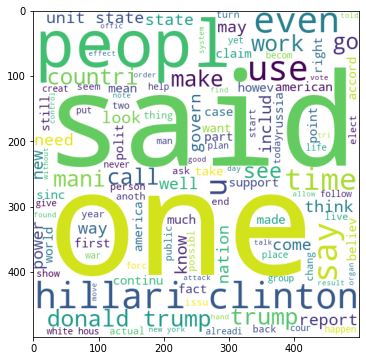

In [ ]:
import matplotlib.pyplot as plt
fake_news_wc = wc.generate(dfmainnew[dfmainnew['label'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(fake_news_wc)

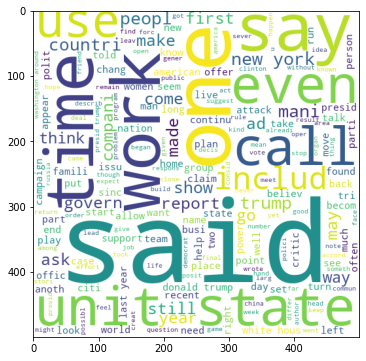

In [ ]:
true_news_wc = wc.generate(dfmainnew[dfmainnew['label'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(true_news_wc)

In [ ]:
dfmainnew.duplicated().sum()

0

In [ ]:
dfmainnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20203 entries, 0 to 20799
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                20203 non-null  int64 
 1   transformed_text  20203 non-null  object
 2   label             20203 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 631.3+ KB


### Model Building

In [ ]:
dfmainnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20203 entries, 0 to 20799
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                20203 non-null  int64 
 1   transformed_text  20203 non-null  object
 2   label             20203 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 631.3+ KB


In [ ]:
dfmainnew.head()

,id,transformed_text,label
0,0,hous dem aid even see comey letter jason chaff...,1
1,1,ever get feel life circl roundabout rather hea...,0
2,2,truth might get fire octob 29 2016 tension int...,1
3,3,video 15 civilian kill singl us airstrik ident...,1
4,4,print iranian woman sentenc six year prison ir...,1


In [ ]:
## Taking the top 8000 most common words
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
Xmain = tfidf.fit_transform(dfmainnew['transformed_text']).toarray()

In [ ]:
Xmain

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.02619395, 0.0248797 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.04303479, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
Xmain.shape

(20203, 3000)

In [ ]:
y = dfmainnew['label']

In [ ]:
y.shape

(20203,)

### Splitting the data into training and test data

In [ ]:

## This is a high precision model presion matters here
## Here data is imbalanced to Precision will matter the most
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Xmain, y, test_size=0.20, random_state=3)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8398911160603811
[[1799  253]
 [ 394 1595]]
0.8630952380952381


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.8572135609997525
[[1863  189]
 [ 388 1601]]
0.894413407821229


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.7265528334570651
[[1341  711]
 [ 394 1595]]
0.691673894189072


### As it can be seen that mnb is performing better so I will go with the same

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)


In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc
}

In [ ]:
## Defining a method that will train the data according to the passed classifier
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [ ]:
# Training the data on all the classifiers respectively and finding out the accuracy and the precision
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9569413511507052
Precision -  0.9553437029603613
For  KN
Accuracy -  0.5961395694135115
Precision -  0.5499300699300699
For  NB
Accuracy -  0.888641425389755
Precision -  0.9306099608282037
For  DT
Accuracy -  0.8777530314278644
Precision -  0.8698664027709055
For  LR
Accuracy -  0.949269982677555
Precision -  0.9411473788328387
For  RF
Accuracy -  0.9403612967087355
Precision -  0.9556830031282586
For  AdaBoost
Accuracy -  0.9289779757485771
Precision -  0.930668016194332


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores})

In [ ]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.956941,0.955344
1,KN,0.596140,0.549930
2,NB,0.888641,0.930610
3,DT,0.877753,0.869866
4,LR,0.949270,0.941147
5,RF,0.940361,0.955683
6,AdaBoost,0.928978,0.930668


### As it can be seen that SVC out performs every classsifier, So we wil choose this classfier furthur for out model

In [ ]:
svc = SVC(kernel='linear',random_state=0)

In [ ]:
svc.fit(X_train,y_train)
y_pred2 = svc.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9443207126948775
[[1943  109]
 [ 116 1873]]
0.9450050454086781


In [ ]:
import pickle
pickle.dump(tfidf,open('aman_vector.pkl','wb'))
pickle.dump(svc,open('aman_model.pkl','wb'))

In [ ]:
clf.fit(X_train,y_train)
y_pred2 = clf.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

In [ ]:
from sklearn.svm import SVC
clf=SVC()
clf


SVC()

In [ ]:
clf.fit(X_train,y_train)
pred=clf.predict(X_test)
confusion_matrix(y_test,pred)
print(accuracy_score(y_test,pred))
print(precision_score(y_test,pred))
print(confusion_matrix(y_test,pred))

0.9487750556792873
0.9459459459459459


In [ ]:
pred

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizerrupesh.pkl','wb'))
pickle.dump(clf,open('modelrupesh.pkl','wb'))